In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from matplotlib.pyplot import xticks
from sklearn.datasets import make_classification


In [9]:
X, y = make_classification(random_state=27, class_sep=1, n_features=2, n_redundant=0,
n_informative=2, n_clusters_per_class=1, n_classes = 4, n_samples=100)

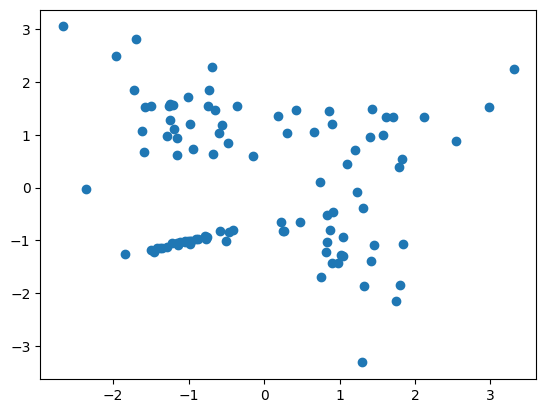

In [10]:
plt.scatter(X[:,0], X[:,1])

In [39]:
def cluster_center(X, c):
    centers = np.zeros((4,2))
    for i in range(1,4):
        ix = np.where(c == i)
        centers[i-1,:] = np.mean(X[ix,:], axis=1)
        
    return centers

In [17]:
mergings_single = linkage(X, method='single')
#T = fcluster(mergings, 4, criterion='maxclust')
#c = cluster_center(X, T)

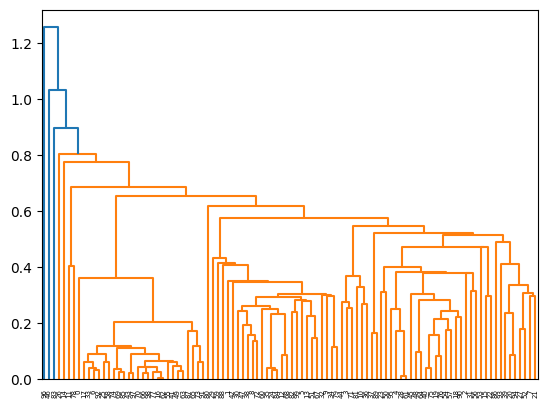

In [18]:
dendrogram(mergings_single)
plt.show()

In [21]:
mergings_complete = linkage(X, method='complete')

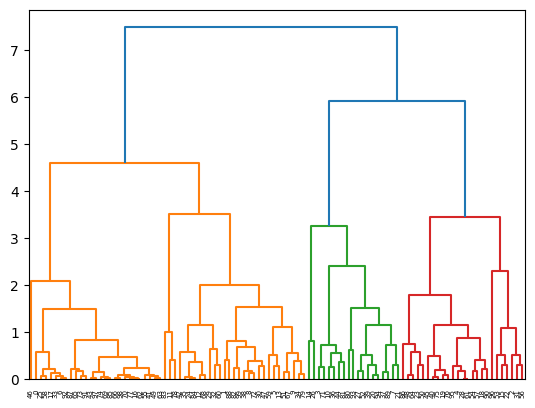

In [22]:
dendrogram(mergings_complete)
plt.show()

In [25]:
mergings_ward = linkage(X, method='ward')

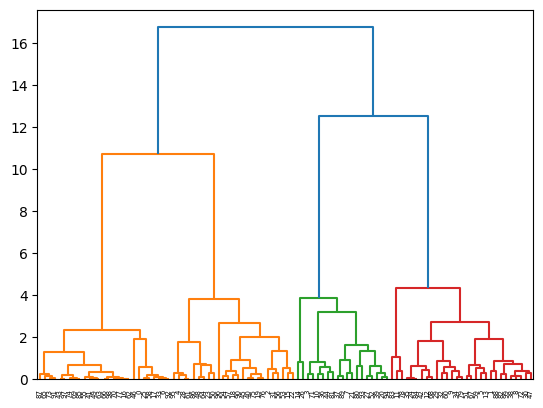

In [26]:
dendrogram(mergings_ward)
plt.show()

[1 2 4 3 4 2 1 3 2 2 3 2 2 2 3 4 1 1 4 4 3 3 4 4 2 1 3 3 4 2 2 4 2 1 2 2 3
 3 2 3 4 1 2 1 3 4 1 2 4 1 4 2 3 4 4 1 4 4 1 2 2 4 1 1 4 1 1 2 2 1 1 3 2 1
 1 4 4 1 2 2 3 3 2 2 2 1 4 1 2 3 4 1 1 3 3 4 4 1 1 2]


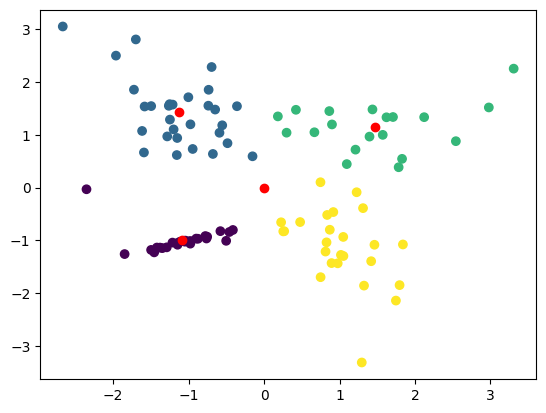

In [40]:
T = fcluster (mergings_complete, 4, 'maxclust')
print (T)
plt.scatter(X[:,0], X[:,1], c=T)
c = cluster_center(X, T)
plt.scatter(c[:,0], c[:,1], c='red')

In [42]:
def sum_sq_dist(X, clust, cent):
    sums = np.zeros(4)
    for i in range(1,4+1):
        ix = np.where(clust == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i-1]])**2)
    return np.sum(sums) / 4

def sum_av_sq_dist(X, clust, cent):
    sums = np.zeros(4)
    for i in range(1,4+1):
        ix = np.where(clust == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i-1]])**2)/len(*X[ix,:])
    return np.sum(sums) / 4

def sum_cl_dist(cent):
    sums = np.sum(euclidean_distances(cent, cent))
    return sums / 4

In [43]:
sum_sq_dist(X, T, c)

29.1889009325331

In [44]:
sum_av_sq_dist(X, T, c)

1.1892424768494498

In [45]:
sum_cl_dist(c)

6.7531684135548415

In [47]:
import warnings
warnings.filterwarnings("ignore")
clussters = []
dist = []
cent = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    clussters.append(kmeans.predict(X))
    cent.append(kmeans.cluster_centers_)
    dist.append(kmeans.inertia_ / k)


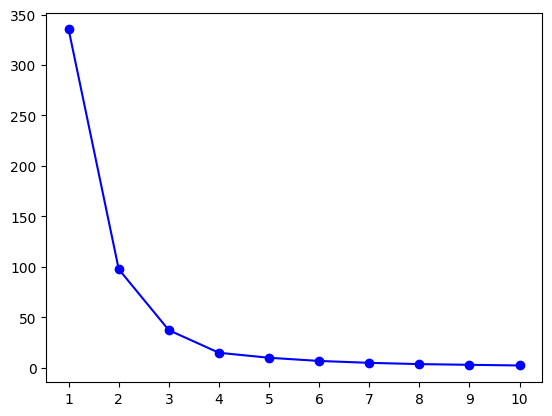

In [48]:
xticks(np.arange(1, 11, step=1)) 
plt.plot(range(1, 11), dist, '-bo')

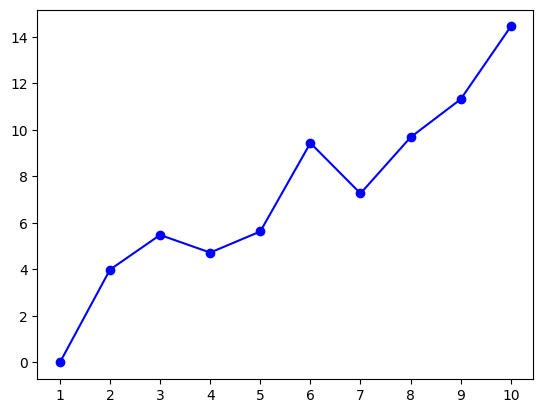

In [49]:
metric = []
for k in range(10):
    sums = np.zeros(k)
    for i in range(k):
        ix = np.where(clussters[k] == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[k][i-1]])**2)/len(*X[ix,:])
    metric.append(np.sum(sums) / (k+1))
xticks(np.arange(1, 11, step=1)) 
plt.plot(range(1, 11), metric, '-bo')

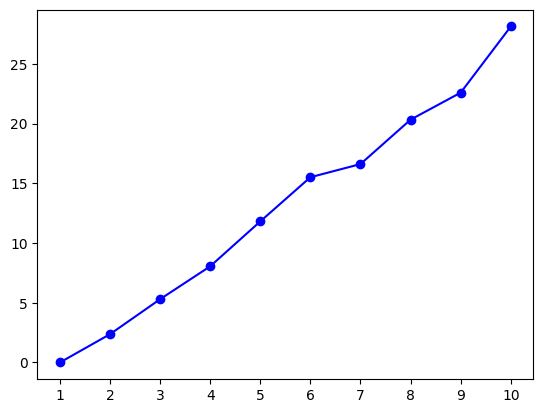

In [50]:
metric = []
for k in range(10):
    sums = np.sum(euclidean_distances(cent[k], cent[k]))
    metric.append(sums / (k+1))
xticks(np.arange(1, 11, step=1)) 
plt.plot(range(1, 11), metric, '-bo')